In [1]:
!pip install transformers

     |████████████████████████████████| 2.3MB 31.7MB/s 
     |████████████████████████████████| 901kB 36.4MB/s 
     |████████████████████████████████| 3.3MB 38.9MB/s 


In [2]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import transformers
from transformers import AutoModel, BertTokenizerFast
import seaborn as sns
import matplotlib.pyplot as plt
# specify GPU
device = torch.device("cuda")

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [4]:
# import libarries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D,  Flatten, Dense, Dropout, LSTM, SpatialDropout1D, Bidirectional,BatchNormalization

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [5]:
from sklearn.metrics import classification_report

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
trofi=pd.read_csv('drive/My Drive/datasets/TroFi_formatted_all3737.csv')

In [8]:
trofi.drop(["verb", "verb_idx"], inplace=True, axis=1)

In [9]:
df = trofi
df.head()

,sentence,label
0,An Energy Department spokesman says the sulfur...,0
1,The yellow beta carotene pigment absorbs blue ...,0
2,"This time , the ground absorbed the shock wave...",0
3,'' Vitamins could be passed right out of the b...,0
4,"As Eliot wrote : '' In a warm haze , the sultr...",0


In [10]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
df_np=df['sentence'].to_numpy()

In [12]:
df_np

array(['An Energy Department spokesman says the sulfur dioxide might be simultaneously recoverable through the use of powdered limestone , which tends to absorb the sulfur ',
       'The yellow beta carotene pigment absorbs blue -LRB- not yellow -RRB- laser light ',
       'This time , the ground absorbed the shock waves enough to transfer her images to the metal in bas - relief ',
       ...,
       "The combination was supposed to make First RepublicBank Texas 's dominant financial institution ; instead , its $ 24.1 billion loan portfolio has withered in the state 's hard - scrabble economy ",
       'Indeed , thanks to a well - oiled political machine and skilled manipulation of Panamanian nationalism and class rivalries , Gen. Noriega may well remain in charge for months , even under withering pressure from the U.S ',
       'But by 1985 the boom was over , and sales had withered to $ 100 million '],
      dtype=object)

In [13]:
df_enc = tokenizer.batch_encode_plus(df_np.tolist(),max_length = 30,padding='max_length',truncation=True)

In [14]:
df_enc

{'input_ids': [[101, 2019, 2943, 2533, 14056, 2758, 1996, 17864, 14384, 2453, 2022, 7453, 8980, 3085, 2083, 1996, 2224, 1997, 9898, 2098, 9771, 1010, 2029, 12102, 2000, 16888, 1996, 17864, 102, 0], [101, 1996, 3756, 8247, 2482, 12184, 2638, 28815, 16888, 2015, 2630, 1011, 1048, 15185, 1011, 2025, 3756, 1011, 25269, 2497, 1011, 9138, 2422, 102, 0, 0, 0, 0, 0, 0], [101, 2023, 2051, 1010, 1996, 2598, 9063, 1996, 5213, 5975, 2438, 2000, 4651, 2014, 4871, 2000, 1996, 3384, 1999, 19021, 1011, 4335, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1005, 1005, 17663, 2015, 2071, 2022, 2979, 2157, 2041, 1997, 1996, 2303, 2302, 2108, 9063, 1010, 1005, 1005, 2002, 2758, 102, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2004, 16292, 2626, 1024, 1005, 1005, 1999, 1037, 4010, 16332, 1010, 1996, 21396, 11129, 2422, 2003, 9063, 1010, 2025, 25416, 22648, 3064, 1010, 2011, 4462, 2962, 1012, 1012, 102], [101, 2047, 10369, 13058, 1012, 1010, 5955, 2669, 1010, 6643, 1012, 1010, 4107, 1037, 2980, 1011, 3899, 1011, 5044, 25742, 2008, 168

In [15]:
trofi_train_seq = torch.tensor(df_enc['input_ids'])
trofi_train_mask = torch.tensor(df_enc['attention_mask'])
# trofi_train_y = torch.tensor(train_labels1.tolist())
df_encodec=trofi_train_seq + trofi_train_mask

In [16]:
df_encodec

tensor([[  102,  2020,  2944,  ..., 17865,   103,     0],
        [  102,  1997,  3757,  ...,     0,     0,     0],
        [  102,  2024,  2052,  ...,     0,     0,     0],
        ...,
        [  102,  1997,  5258,  ...,  2039,  2008,   103],
        [  102,  5263,  1011,  ..., 28873,  2051,   103],
        [  102,  2022,  2012,  ...,     0,     0,     0]])

In [17]:
df_encoded = pd.DataFrame(df_encodec.numpy())

In [18]:
# Insert the original columns in the beginning of the encoded dataframe
df_encoded.insert(loc=0, column='sentence', value=df["sentence"])
df_encoded.insert(loc=0, column='label', value=df["label"])

In [19]:
df_encoded.shape

(3737, 32)

In [20]:
df_encoded.to_csv("drive/My Drive/datasets/trofi_data_encoded.csv", index=False)

In [21]:
data = df_encoded

In [22]:
data.head()

,label,sentence,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,An Energy Department spokesman says the sulfur...,102,2020,2944,2534,14057,2759,1997,17865,14385,2454,2023,7454,8981,3086,2084,1997,2225,1998,9899,2099,9772,1011,2030,12103,2001,16889,1997,17865,103,0
1,0,The yellow beta carotene pigment absorbs blue ...,102,1997,3757,8248,2483,12185,2639,28816,16889,2016,2631,1012,1049,15186,1012,2026,3757,1012,25270,2498,1012,9139,2423,103,0,0,0,0,0,0
2,0,"This time , the ground absorbed the shock wave...",102,2024,2052,1011,1997,2599,9064,1997,5214,5976,2439,2001,4652,2015,4872,2001,1997,3385,2000,19022,1012,4336,103,0,0,0,0,0,0,0
3,0,'' Vitamins could be passed right out of the b...,102,1006,1006,17664,2016,2072,2023,2980,2158,2042,1998,1997,2304,2303,2109,9064,1011,1006,1006,2003,2759,103,0,0,0,0,0,0,0,0
4,0,"As Eliot wrote : '' In a warm haze , the sultr...",102,2005,16293,2627,1025,1006,1006,2000,1038,4011,16333,1011,1997,21397,11130,2423,2004,9064,1011,2026,25417,22649,3065,1011,2012,4463,2963,1013,1013,103


In [23]:
X = data.drop(["label", "sentence"], axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [24]:
X_val =None
y_val = None

In [25]:
X_val=X_test.iloc[0:750,:].append(X_train.iloc[0:300,:], ignore_index=True, sort=False)

In [26]:
y_val = y_test.iloc[0:750].append(y_train.iloc[0:300], ignore_index=True)

Normal Neural Network

In [27]:
model = Sequential()

model.add(Dense(1000, input_shape=(30,), activation="relu"))
model.add(BatchNormalization(axis=-1))

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(10, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              31000     
_________________________________________________________________
batch_normalization (BatchNo (None, 1000)              4000      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               256256    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1

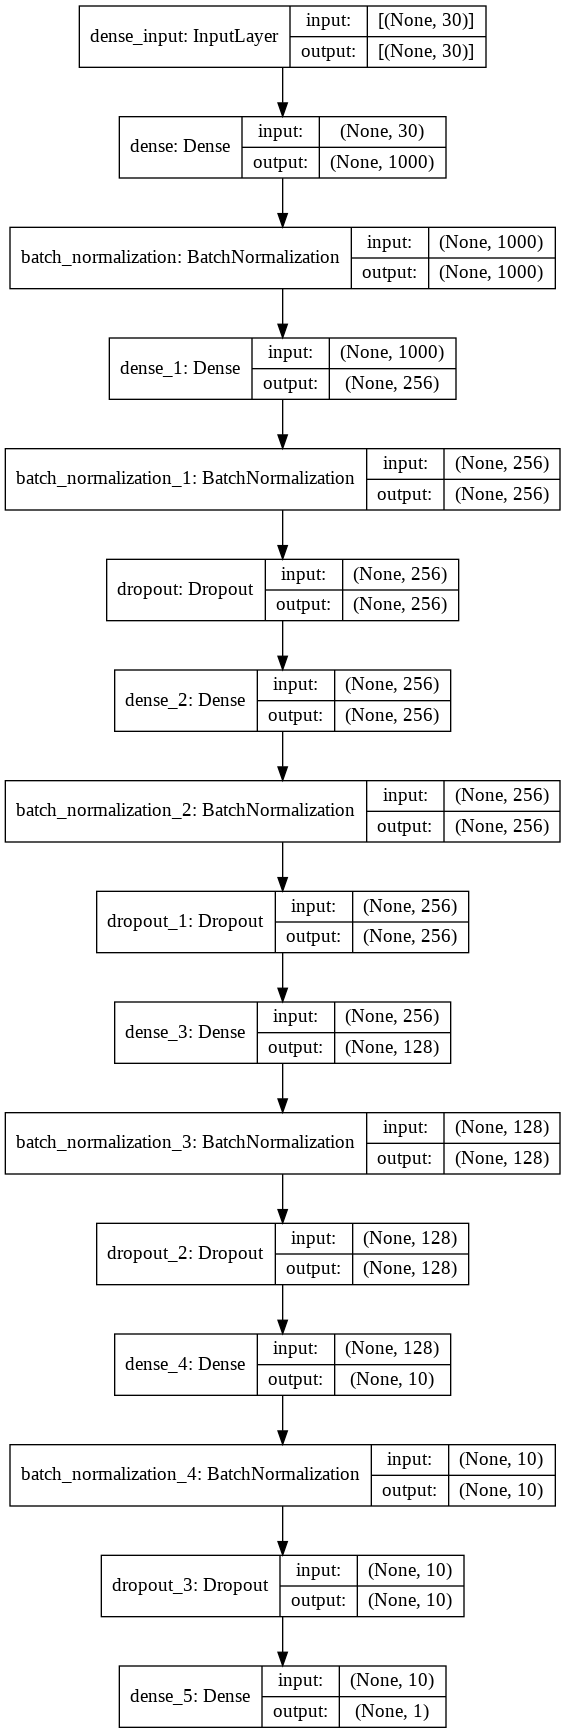

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [30]:
# defining the learning rate, the number of epochs and the batch size
INIT_LR = 0.001
NUM_EPOCHS = 30
BS = 64
opt = RMSprop(lr = INIT_LR)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [31]:
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [32]:
# Reduce the learning rate by half if validation accuracy has not increased in the last 3 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

In [33]:
fitted_network = model.fit(X_train, y_train, validation_split=0.2, batch_size=BS, epochs=NUM_EPOCHS, callbacks=[learning_rate_reduction])

Epoch 1/30
36/36 [==============================] - 5s 14ms/step - loss: 0.8611 - accuracy: 0.4940 - val_loss: 1.1915 - val_accuracy: 0.5508
Epoch 2/30
36/36 [==============================] - 0s 7ms/step - loss: 0.7531 - accuracy: 0.5301 - val_loss: 1.1751 - val_accuracy: 0.5472
Epoch 3/30
36/36 [==============================] - 0s 7ms/step - loss: 0.7408 - accuracy: 0.5422 - val_loss: 0.9476 - val_accuracy: 0.5437
Epoch 4/30
36/36 [==============================] - 0s 6ms/step - loss: 0.7133 - accuracy: 0.5462 - val_loss: 0.9789 - val_accuracy: 0.5365
Epoch 5/30
36/36 [==============================] - 0s 7ms/step - loss: 0.7098 - accuracy: 0.5645 - val_loss: 0.8520 - val_accuracy: 0.5419
Epoch 6/30
36/36 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.5689 - val_loss: 0.8919 - val_accuracy: 0.5597
Epoch 7/30
36/36 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.5850 - val_loss: 0.8008 - val_accuracy: 0.5455
Epoch 8/30
36/36 [=

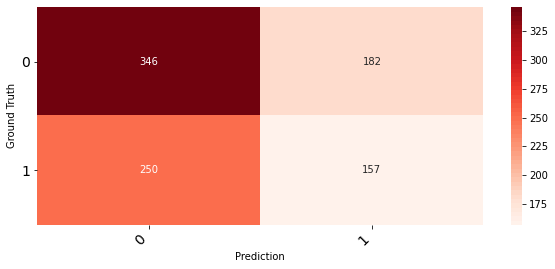

Accuray: 53.797%
ROC-AUC: 0.52053
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       528
           1       0.46      0.39      0.42       407

    accuracy                           0.54       935
   macro avg       0.52      0.52      0.52       935
weighted avg       0.53      0.54      0.53       935



In [34]:
# predict results
preds = np.round(model.predict(X_test)).flatten()

# Plot confusion matrix
plt.figure(figsize=(10,4))
heatmap = sns.heatmap(data = pd.DataFrame(confusion_matrix(y_test, preds)), annot = True, fmt = "d", cmap=sns.color_palette("Reds", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

# Print accuracy, ROC and classification report for the test-set
print(f"""Accuray: {round(accuracy_score(y_test, preds), 5) * 100}%
ROC-AUC: {round(roc_auc_score(y_test, preds), 5)}""")
print(classification_report(y_test, preds))

In [73]:
x = ["Sir will kill me tomorrow."]

In [74]:
xt = tokenizer.batch_encode_plus(x,max_length = 30,padding='max_length',truncation=True)

In [75]:
trofi_train_seq = torch.tensor(xt['input_ids'])
trofi_train_mask = torch.tensor(xt['attention_mask'])
# trofi_train_y = torch.tensor(train_labels1.tolist())
xf=trofi_train_seq + trofi_train_mask

In [76]:
xtt= pd.DataFrame(xf.numpy())

In [77]:
xx=xtt.to_numpy()

In [78]:
xx

array([[ 102, 2910, 2098, 3103, 2034, 4827, 1013,  103,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])

In [72]:
model.predict(xx)

array([[0.56225157]], dtype=float32)

LSTM

In [42]:
#LSTM layer arcitecture hyperparameters
n_lstm = 20
drop_lstm =0.5

In [43]:
model1 = Sequential()
model1.add(Embedding(30000, 64, input_length=30))

model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Flatten())

model1.add(Dense(24, activation='relu'))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

# model1.add(Dense(1, activation='softmax'))


In [44]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 64)            1920000   
_________________________________________________________________
lstm (LSTM)                  (None, 30, 20)            6800      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 20)            3280      
_________________________________________________________________
flatten (Flatten)            (None, 600)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                14424     
_________________________________________________________________
flatten_1 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

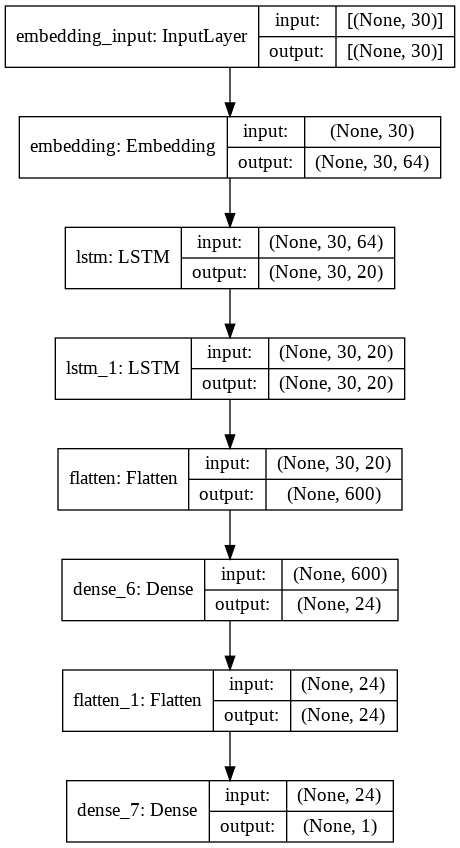

In [45]:
plot_model(model1, show_shapes=True)

In [46]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [47]:
num_epochs = 10
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model1.fit(X_train, y_train, epochs=num_epochs, 
                    validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
88/88 - 9s - loss: 0.6866 - accuracy: 0.5578 - val_loss: 0.6824 - val_accuracy: 0.5658
Epoch 2/10
88/88 - 2s - loss: 0.5941 - accuracy: 0.6699 - val_loss: 0.7119 - val_accuracy: 0.6214
Epoch 3/10
88/88 - 2s - loss: 0.3348 - accuracy: 0.8630 - val_loss: 0.7459 - val_accuracy: 0.5947
Epoch 4/10
88/88 - 2s - loss: 0.1751 - accuracy: 0.9329 - val_loss: 1.0835 - val_accuracy: 0.6075
Epoch 5/10
88/88 - 2s - loss: 0.0940 - accuracy: 0.9668 - val_loss: 1.3359 - val_accuracy: 0.6086
Epoch 6/10
88/88 - 2s - loss: 0.0574 - accuracy: 0.9818 - val_loss: 1.2614 - val_accuracy: 0.6032
Epoch 7/10
88/88 - 2s - loss: 0.0411 - accuracy: 0.9886 - val_loss: 1.7126 - val_accuracy: 0.6021
Epoch 8/10
88/88 - 2s - loss: 0.0364 - accuracy: 0.9904 - val_loss: 1.7200 - val_accuracy: 0.6064
Epoch 9/10
88/88 - 2s - loss: 0.0255 - accuracy: 0.9925 - val_loss: 1.8794 - val_accuracy: 0.6000
Epoch 10/10
88/88 - 2s - loss: 0.0317 - accuracy: 0.9914 - val_loss: 1.4473 - val_accuracy: 0.6096


In [48]:
# Create a dataframe
metrics = pd.DataFrame(history.history)

# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

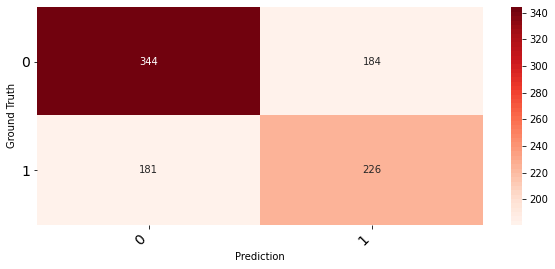

Accuray: 60.963%
ROC-AUC: 0.6034
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       528
           1       0.55      0.56      0.55       407

    accuracy                           0.61       935
   macro avg       0.60      0.60      0.60       935
weighted avg       0.61      0.61      0.61       935



In [49]:
# predict results
preds = np.round(model1.predict(X_test)).flatten()

# Plot confusion matrix
plt.figure(figsize=(10,4))
heatmap = sns.heatmap(data = pd.DataFrame(confusion_matrix(y_test, preds)), annot = True, fmt = "d", cmap=sns.color_palette("Reds", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

# Print accuracy, ROC and classification report for the test-set
print(f"""Accuray: {round(accuracy_score(y_test, preds), 5) * 100}%
ROC-AUC: {round(roc_auc_score(y_test, preds), 5)}""")
print(classification_report(y_test, preds))

In [50]:
x = ["what is your name"]

In [51]:
xt = tokenizer.batch_encode_plus(x,max_length = 30,padding='max_length',truncation=True)


In [52]:
trofi_train_seq = torch.tensor(xt['input_ids'])
trofi_train_mask = torch.tensor(xt['attention_mask'])
# trofi_train_y = torch.tensor(train_labels1.tolist())
xf=trofi_train_seq + trofi_train_mask

In [53]:
xtt= pd.DataFrame(xf.numpy())

In [54]:
xx=xtt.to_numpy()

In [55]:
xx

array([[ 102, 2055, 2004, 2116, 2172,  103,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])

In [56]:
model1.predict(xx)

array([[0.2069229]], dtype=float32)

Bi-LSTM

In [57]:
model2 = Sequential()
model2.add(Embedding(30000,64, input_length=30))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

In [58]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [59]:
num_epochs = 10
early_stop = EarlyStopping(monitor='accuracy', patience=5)
history = model2.fit(X_train, y_train, epochs=num_epochs 
                    ,callbacks =[early_stop], verbose=2)

Epoch 1/10
88/88 - 4s - loss: 0.6847 - accuracy: 0.5653
Epoch 2/10
88/88 - 2s - loss: 0.5850 - accuracy: 0.6870
Epoch 3/10
88/88 - 2s - loss: 0.2732 - accuracy: 0.8897
Epoch 4/10
88/88 - 2s - loss: 0.0809 - accuracy: 0.9732
Epoch 5/10
88/88 - 2s - loss: 0.0543 - accuracy: 0.9857
Epoch 6/10
88/88 - 2s - loss: 0.0286 - accuracy: 0.9929
Epoch 7/10
88/88 - 2s - loss: 0.0307 - accuracy: 0.9921
Epoch 8/10
88/88 - 2s - loss: 0.0220 - accuracy: 0.9936
Epoch 9/10
88/88 - 2s - loss: 0.0297 - accuracy: 0.9932
Epoch 10/10
88/88 - 2s - loss: 0.0160 - accuracy: 0.9957


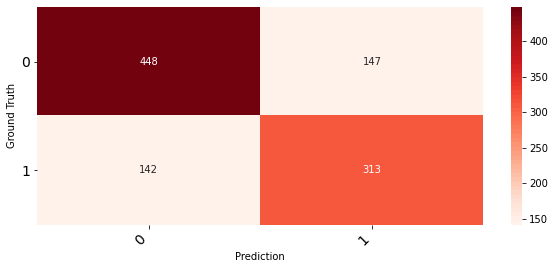

Accuray: 72.476%
ROC-AUC: 0.72043
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       595
           1       0.68      0.69      0.68       455

    accuracy                           0.72      1050
   macro avg       0.72      0.72      0.72      1050
weighted avg       0.73      0.72      0.72      1050



In [60]:
# predict results
preds = np.round(model1.predict(X_val)).flatten()

# Plot confusion matrix
plt.figure(figsize=(10,4))
heatmap = sns.heatmap(data = pd.DataFrame(confusion_matrix(y_val, preds)), annot = True, fmt = "d", cmap=sns.color_palette("Reds", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

# Print accuracy, ROC and classification report for the test-set
print(f"""Accuray: {round(accuracy_score(y_val, preds), 5) * 100}%
ROC-AUC: {round(roc_auc_score(y_val, preds), 5)}""")
print(classification_report(y_val, preds))

In [61]:
x = ["If I didn't do my homework, sir will kill me tomorrow."]

In [62]:
xt = tokenizer.batch_encode_plus(x,max_length = 30,padding='max_length',truncation=True)


In [63]:
trofi_train_seq = torch.tensor(xt['input_ids'])
trofi_train_mask = torch.tensor(xt['attention_mask'])
# trofi_train_y = torch.tensor(train_labels1.tolist())
xf=trofi_train_seq + trofi_train_mask

In [64]:
xtt= pd.DataFrame(xf.numpy())

In [65]:
model2.predict(xtt)

array([[0.2827642]], dtype=float32)